In [347]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt

In [348]:
df = pd.read_csv('weatherAUS.csv')

In [349]:
df.sample(5)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
144053,2013-08-19,Uluru,5.6,24.9,0.0,NaN,NaN,ESE,43.0,ESE,...,36.0,18.0,1021.7,1017.7,NaN,NaN,15.0,23.6,No,No
35753,2015-05-12,SydneyAirport,11.8,23.5,0.0,6.6,10.3,WNW,61.0,NW,...,44.0,29.0,1014.0,1009.9,0.0,1.0,18.2,22.5,No,No
66665,2016-01-08,MelbourneAirport,13.4,22.8,0.0,7.4,8.6,SSE,35.0,SSW,...,60.0,51.0,1023.3,1021.7,7.0,7.0,16.3,21.0,No,No
120343,2016-09-04,PerthAirport,7.7,22.6,0.0,2.8,7.3,WSW,35.0,NE,...,64.0,38.0,1021.3,1016.6,7.0,2.0,13.4,21.4,No,No
125109,2012-08-09,SalmonGums,-3.3,18.5,0.0,NaN,NaN,NE,28.0,NE,...,66.0,33.0,NaN,NaN,NaN,NaN,11.7,17.1,No,No


In [350]:
df.shape

(145460, 23)

In [351]:
df.isnull().mean()*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [352]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [353]:
df['Date'] = pd.to_datetime(df['Date'])

In [354]:
df['Month'] = df['Date'].dt.month

In [355]:
df.drop(columns=['Date'], inplace=True)

In [356]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [357]:
df['RainfallRegion'] = df['Location'].map(location_to_rainfall_area)

In [358]:
df['RainfallRegion'].unique()

array(['Riverina Zone', 'Arid Zone', 'Central Coast Zone', nan,
       'Temperate Coastal Zone', 'Island Zone', 'Eastern Highlands Zone',
       'Inland Zone', 'Mountain Zone', 'Subtropical Zone',
       'Tropical Zone', 'Southern Coastal Zone', 'Mediterranean Zone',
       'Western Plateau Zone', 'Cool Temperate Zone'], dtype=object)

In [359]:
# Define the mapping for the provided list
additional_rainfall_region_mapping = {
    'Moree': 'Inland Zone',
    'SydneyAirport': 'Central Coast Zone',
    'Tuggeranong': 'Eastern Highlands Zone',
    'MelbourneAirport': 'Southern Coastal Zone',
    'Nhil': 'Arid Zone',
    'Watsonia': 'Southern Coastal Zone',
    'PearceRAAF': 'Mediterranean Zone'
}

# Update the RainfallRegion column using the mapping
df['RainfallRegion'] = df['RainfallRegion'].fillna(df['Location'].map(additional_rainfall_region_mapping))

In [374]:
df.sample(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,RainfallRegion
90708,GoldCoast,19.8,25.4,3.2,SSE,80.0,ESE,SE,37.0,46.0,79.0,80.0,1024.5,1022.2,22.7,23.0,Yes,Yes,3,Subtropical Zone
75252,Portland,8.5,16.7,0.0,NNW,52.0,NNW,WNW,33.0,11.0,38.0,57.0,1005.9,1005.8,16.0,15.6,No,No,9,Inland Zone
101656,MountGambier,13.9,26.5,0.0,S,44.0,SE,ESE,26.0,26.0,79.0,50.0,1017.0,1013.9,17.5,24.4,No,No,1,Southern Coastal Zone
121830,Perth,13.9,22.6,0.2,NW,39.0,NW,NW,15.0,15.0,57.0,79.0,1008.1,1007.3,20.6,19.9,No,Yes,11,Mediterranean Zone
44320,Wollongong,17.7,27.6,0.0,SW,39.0,WSW,E,17.0,19.0,32.0,56.0,1008.8,1007.6,23.6,23.8,No,Yes,1,Temperate Coastal Zone


In [361]:
df.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'], inplace=True)

In [362]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Month', 'RainfallRegion'],
      dtype='object')

In [363]:
df.isnull().mean()*100

Location           0.000000
MinTemp            1.020899
MaxTemp            0.866905
Rainfall           2.241853
WindGustDir        7.098859
WindGustSpeed      7.055548
WindDir9am         7.263853
WindDir3pm         2.906641
WindSpeed9am       1.214767
WindSpeed3pm       2.105046
Humidity9am        1.824557
Humidity3pm        3.098446
Pressure9am       10.356799
Pressure3pm       10.331363
Temp9am            1.214767
Temp3pm            2.481094
RainToday          2.241853
RainTomorrow       2.245978
Month              0.000000
RainfallRegion     0.000000
dtype: float64

In [364]:
df.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'Month', 'RainfallRegion'],
      dtype='object')

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Location        145460 non-null  object 
 1   MinTemp         143975 non-null  float64
 2   MaxTemp         144199 non-null  float64
 3   Rainfall        142199 non-null  float64
 4   WindGustDir     135134 non-null  object 
 5   WindGustSpeed   135197 non-null  float64
 6   WindDir9am      134894 non-null  object 
 7   WindDir3pm      141232 non-null  object 
 8   WindSpeed9am    143693 non-null  float64
 9   WindSpeed3pm    142398 non-null  float64
 10  Humidity9am     142806 non-null  float64
 11  Humidity3pm     140953 non-null  float64
 12  Pressure9am     130395 non-null  float64
 13  Pressure3pm     130432 non-null  float64
 14  Temp9am         143693 non-null  float64
 15  Temp3pm         141851 non-null  float64
 16  RainToday       142199 non-null  object 
 17  RainTomorr

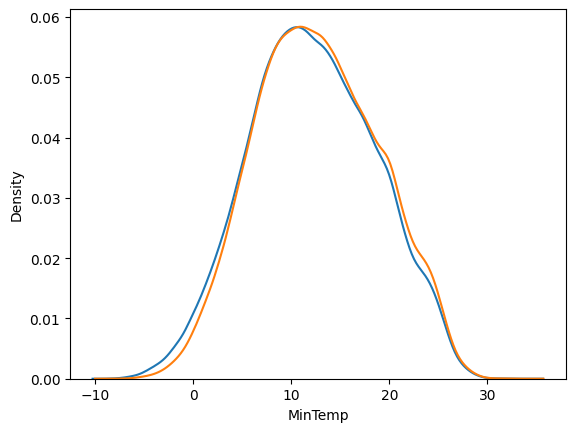

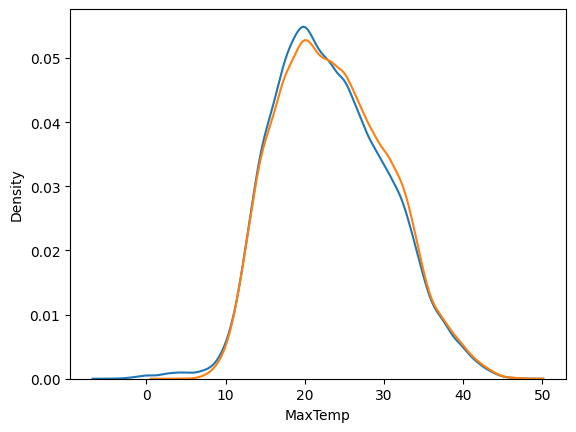

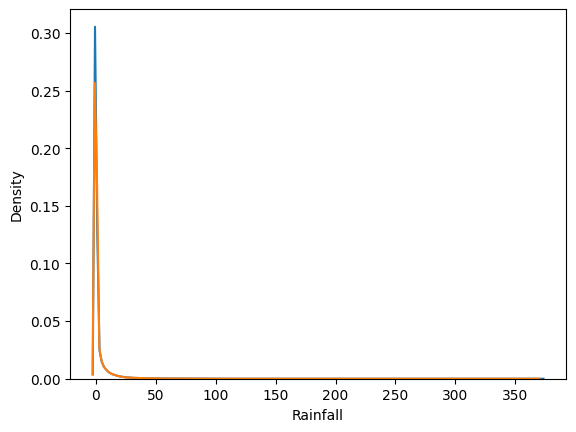

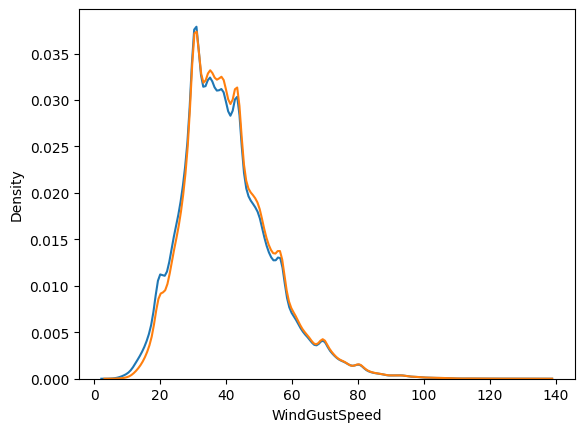

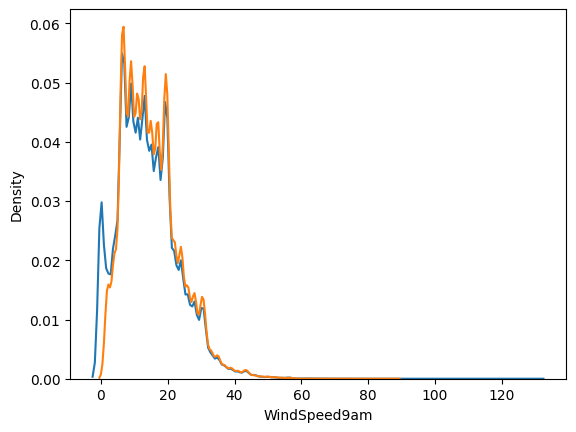

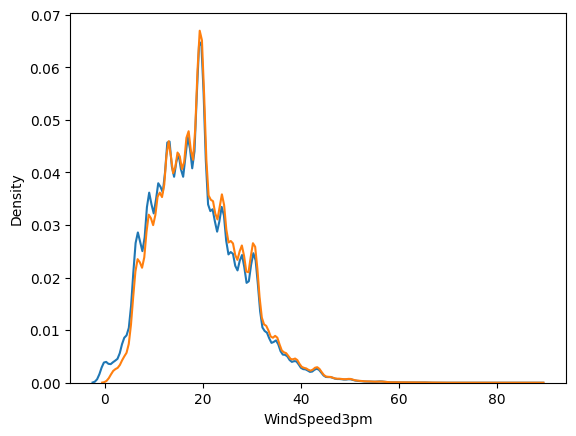

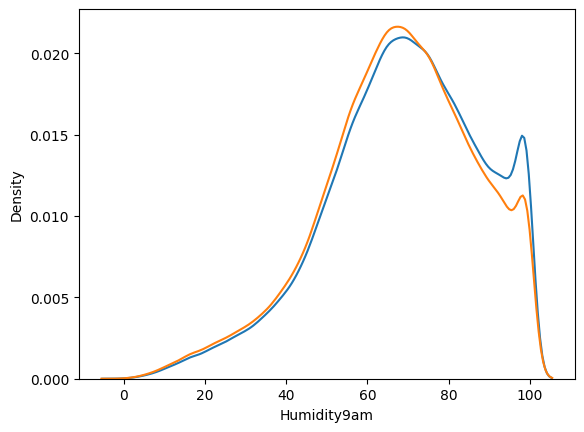

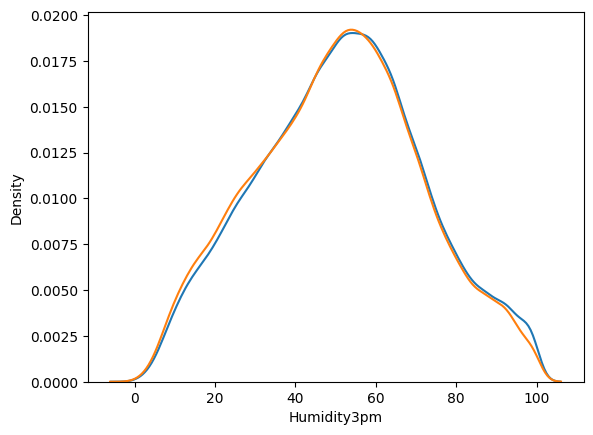

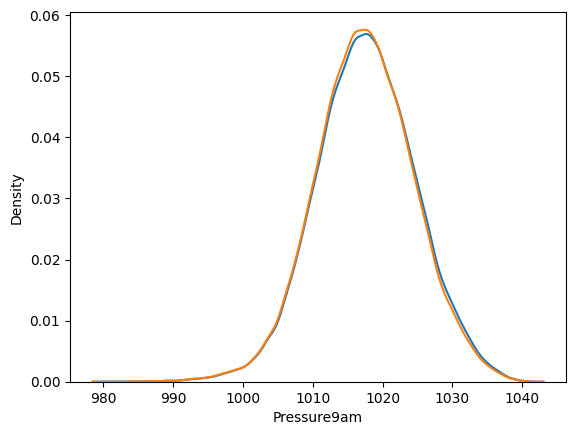

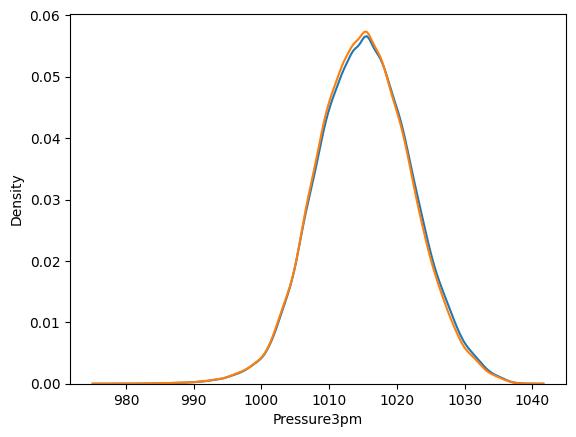

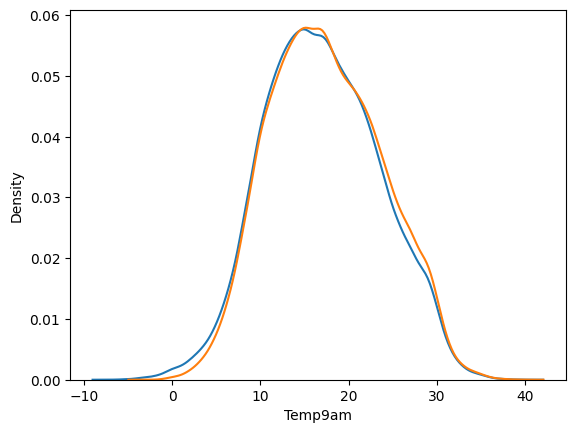

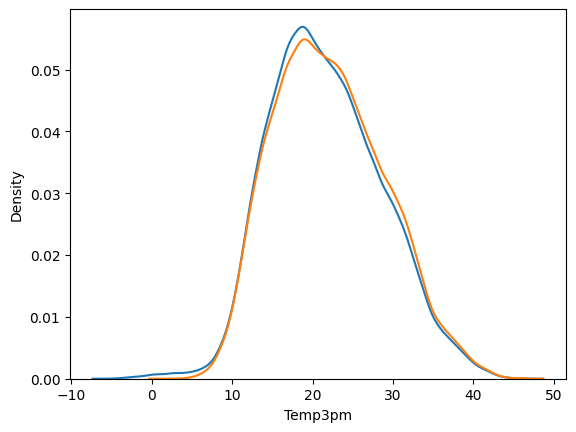

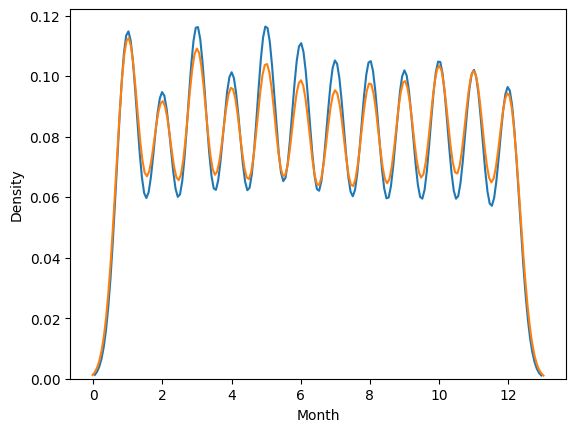

In [366]:
get_cols = df.select_dtypes(include=['float64','int32']).columns
newdf = df[df.columns].dropna()
def comparedrop(col_name):
    sns.kdeplot(df[col_name])
    sns.kdeplot(newdf[col_name])
    plt.show()
for i in range (0,13):
    comparedrop(get_cols[i])

In [367]:
col = ['MaxTemp','MinTemp','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']
def outlier_norm(col):
    mean = df[col].mean()
    std = df[col].std()
    rn1 = mean + 3*std
    rn2 = mean - 3*std 
    size = df[col].shape[0]
    outlier = df[(df[col]>rn1) & (df[col]<rn2)]
    outlier_shape = outlier.shape[0]
    outlier_perc = (outlier_shape/size)*100
    print(f'In {col} outlier is {outlier_perc} percent')
for i in col:
    outlier_norm(i)

In MaxTemp outlier is 0.0 percent
In MinTemp outlier is 0.0 percent
In Humidity3pm outlier is 0.0 percent
In Pressure9am outlier is 0.0 percent
In Pressure3pm outlier is 0.0 percent
In Temp9am outlier is 0.0 percent
In Temp3pm outlier is 0.0 percent


In [368]:
def iqr_proximity_rule(col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]
    outlier_percentage = (outliers.shape[0] / df[col_name].shape[0]) * 100
    print(f"In {col_name}, outliers are {outlier_percentage:.2f}% of the data.")

for col_name in get_cols:
    iqr_proximity_rule(col_name)

In MinTemp, outliers are 0.04% of the data.
In MaxTemp, outliers are 0.34% of the data.
In Rainfall, outliers are 17.58% of the data.
In WindGustSpeed, outliers are 2.13% of the data.
In WindSpeed9am, outliers are 1.25% of the data.
In WindSpeed3pm, outliers are 1.73% of the data.
In Humidity9am, outliers are 0.98% of the data.
In Humidity3pm, outliers are 0.00% of the data.
In Pressure9am, outliers are 0.82% of the data.
In Pressure3pm, outliers are 0.63% of the data.
In Temp9am, outliers are 0.18% of the data.
In Temp3pm, outliers are 0.53% of the data.
In Month, outliers are 0.00% of the data.


In [369]:
total_cols = set(get_cols) - set(col) - {'Rainfall'}
def remove_outlier(col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col_name] > lower_bound) | (df[col_name] < upper_bound)]
new_df = df.copy()
for i in list(total_cols):
    new_df = remove_outlier(i)

In [370]:
df = new_df.copy()

In [371]:
Q1 = df['Rainfall'].quantile(0.25)
Q3 = df['Rainfall'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound,upper_bound)
print(df['Rainfall'].max())

-1.2000000000000002 2.0
371.0


In [383]:
df[['Rainfall','RainToday']][(df['RainToday'] == 'Yes') & (df['Rainfall']>2)].value_counts().reset_index()['count'].sum()

np.int64(25025)

In [410]:
df[(df['RainToday']=='Yes') & (df['RainTomorrow']=='Yes') & (df['Rainfall']>=2)]

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,RainfallRegion
11,Albury,15.9,21.7,2.2,NNE,31.0,NE,ENE,15.0,13.0,89.0,91.0,1010.5,1004.2,15.9,17.0,Yes,Yes,12,Riverina Zone
12,Albury,15.9,18.6,15.6,W,61.0,NNW,NNW,28.0,28.0,76.0,93.0,994.3,993.0,17.4,15.8,Yes,Yes,12,Riverina Zone
17,Albury,13.5,22.9,16.8,W,63.0,N,WNW,6.0,20.0,80.0,65.0,1005.8,1002.2,18.0,21.5,Yes,Yes,12,Riverina Zone
102,Albury,17.1,25.8,5.8,ENE,31.0,NaN,S,0.0,13.0,82.0,68.0,1017.4,1014.7,19.0,23.8,Yes,Yes,3,Riverina Zone
103,Albury,16.4,27.0,3.0,SW,69.0,E,N,9.0,22.0,82.0,74.0,1012.7,1008.0,19.9,19.7,Yes,Yes,3,Riverina Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145306,Uluru,23.1,34.5,6.4,SSW,50.0,ENE,W,19.0,7.0,79.0,56.0,1007.8,1003.7,26.0,32.9,Yes,Yes,1,Arid Zone
145321,Uluru,24.4,37.9,7.6,NE,72.0,E,NE,17.0,31.0,69.0,35.0,1006.2,1002.2,27.7,37.0,Yes,Yes,2,Arid Zone
145391,Uluru,15.2,21.5,6.8,ENE,30.0,NE,ENE,19.0,9.0,65.0,65.0,1016.9,1015.3,19.0,21.2,Yes,Yes,4,Arid Zone
145392,Uluru,17.7,26.9,12.6,S,35.0,E,SSW,15.0,20.0,93.0,59.0,1018.1,1014.7,19.0,26.0,Yes,Yes,4,Arid Zone


In [414]:
df.drop(columns=['Rainfall'])

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,RainfallRegion
0,Albury,13.4,22.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12,Riverina Zone
1,Albury,7.4,25.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12,Riverina Zone
2,Albury,12.9,25.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12,Riverina Zone
3,Albury,9.2,28.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12,Riverina Zone
4,Albury,17.5,32.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12,Riverina Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No,6,Arid Zone
145456,Uluru,3.6,25.3,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No,6,Arid Zone
145457,Uluru,5.4,26.9,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No,6,Arid Zone
145458,Uluru,7.8,27.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No,6,Arid Zone


In [372]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['RainTomorrow']), df['RainTomorrow'], test_size=0.2, random_state=42)